## Models Done for : 
- Savings_Rate (0.96)
- Income_Growth_Rate (0.86)
- Expected_ROI (0.92)

In [24]:
import pandas as pd
df = pd.read_csv('data_final.csv')
df.head()


,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income,Career_Level,Financial_Status,Housing,Food,Transportation,Education,Total_Invested_Amount,Emergency_Funds,Tax_Rate,Cost_of_Living,Monthly_Savings,Income_Growth_Rate,Budget_Adjustments,Expected_ROI,Healthcare_Cost,Debt,Savings_Rate,Desired_Expenses,Inflation_Rate,Retirement_Age,Life_Expectancy
0,56.0,Master's,Technology,5.0,Urban,21.0,Married,Full-time,7.0,Own,Apartment,Male,Public transit,72510.0,Entry-Level,Middle Income,2356.29,10497.31,296.32,2400.02,626675.33,49631.27,0.18,36226.25,25350.55,0.07,0.05,42767.41,8906.10,10591.14,28457.33,24527.93,2.35,63.0,84.0
1,69.0,High School,Finance,0.0,Urban,4.0,Single,Full-time,7.0,Own,Apartment,Male,Biking,75462.0,Late-Career,Middle Income,1384.26,8569.60,520.74,0.00,450665.78,50405.25,0.18,32977.17,29453.73,0.03,0.06,25744.66,18772.34,5510.80,29700.21,44334.32,2.35,63.0,82.0
2,46.0,Bachelor's,Technology,1.0,Urban,1.0,Single,Full-time,7.0,Own,Single-family home,Female,Car,71748.0,Entry-Level,Low Income,1019.15,10457.86,664.89,1344.88,713561.47,45433.34,0.23,31246.34,20517.28,0.08,0.09,83321.10,9642.46,16686.02,22181.83,33326.02,2.35,63.0,83.0
3,32.0,High School,Others,2.0,Urban,32.0,Married,Full-time,1.0,Own,Apartment,Female,Car,74520.0,Entry-Level,Middle Income,3420.17,9961.84,754.01,1717.72,352503.92,56372.54,0.28,33067.74,13461.59,0.09,0.08,59217.72,11004.45,25942.06,11428.21,42327.27,2.35,63.0,83.0
4,60.0,Bachelor's,Finance,3.0,Urban,15.0,Married,Self-employed,4.0,Own,Townhouse,Male,Walking,640210.0,Mid-Career,Middle Income,3225.19,90484.47,545.59,2354.99,5212915.17,375186.06,0.32,280098.45,215835.71,0.07,0.07,350192.33,85179.41,107779.85,232062.93,221683.44,2.35,63.0,83.0


In [11]:
print(df.columns.tolist())

['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents', 'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status', 'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation', 'Income', 'Career_Level', 'Financial_Status', 'Housing', 'Food', 'Transportation', 'Education', 'Total_Invested_Amount', 'Emergency_Funds', 'Tax_Rate', 'Cost_of_Living', 'Monthly_Savings', 'Income_Growth_Rate', 'Budget_Adjustments', 'Expected_ROI', 'Healthcare_Cost', 'Debt', 'Savings_Rate', 'Desired_Expenses', 'Inflation_Rate', 'Retirement_Age', 'Life_Expectancy']


In [12]:
print(df['Income_Growth_Rate'])

0        0.070000
1        0.030000
2        0.080000
3        0.090000
4        0.070000
           ...   
49995    0.050100
49996    0.070193
49997    0.000159
49998    0.050194
49999    0.029672
Name: Income_Growth_Rate, Length: 50000, dtype: float64


## Feature Extraction For Savings Rate

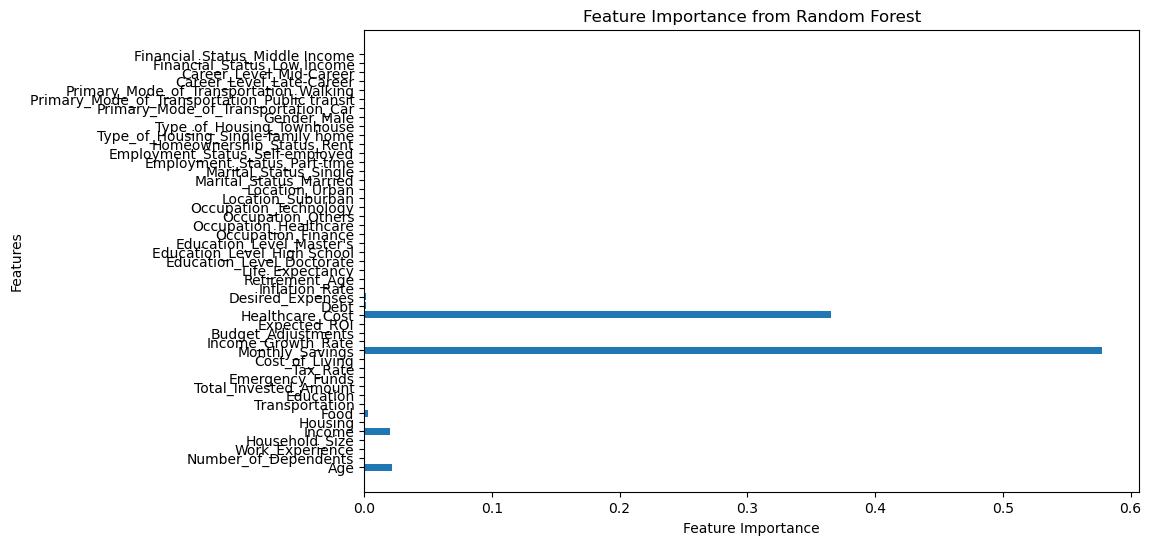

PCA Components:
[[ 1.11294710e-02  4.29147491e-03 -7.39434738e-03 -1.12974066e-03
   3.24494233e-01  6.28715746e-04  3.23059804e-01 -2.09758944e-02
  -2.37002464e-03  3.05397125e-01  3.17623336e-01  1.67006393e-01
   3.05630197e-01  3.07899300e-01  6.62168605e-03  7.12258109e-03
   3.08785485e-01  3.10008617e-01  2.91421296e-01  3.17949924e-01
  -5.62281290e-18  6.13078099e-03 -7.69907113e-03 -9.13984197e-03
   5.75788737e-03 -1.09595736e-03 -9.00864752e-03  4.61197805e-04
   2.67546925e-03  9.75564283e-05  8.58585398e-03 -1.67983842e-02
   6.99634034e-03 -5.89942476e-03  1.33995616e-02 -6.17888779e-03
   2.73071166e-02 -4.86392025e-03 -6.88266590e-03  1.61643549e-05
  -2.46239111e-03  5.53656189e-04 -1.51695454e-04 -6.38659223e-03
   8.02705646e-04  2.97496078e-03 -5.97702991e-03]
 [ 8.74192168e-03 -1.83799551e-02 -5.07941601e-03 -1.02656671e-02
  -9.17851884e-04 -1.83226743e-03 -8.91814409e-04 -5.43729916e-01
  -3.84486828e-02 -6.19302594e-04 -2.23122156e-03  2.93487465e-02
  -9.2414

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df.drop(columns=['Savings_Rate'])  
y = df['Savings_Rate']  
X = pd.get_dummies(X, drop_first=True)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=3)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Applying Random Forest for Feature Importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
feature_importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()
print("PCA Components:")
print(pca.components_)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 30410263965.581493
R-squared: 0.8761591170941551


Using Feature Extraction and Linear Regression, Saving Rate's R-squared: 0.8761591170941551


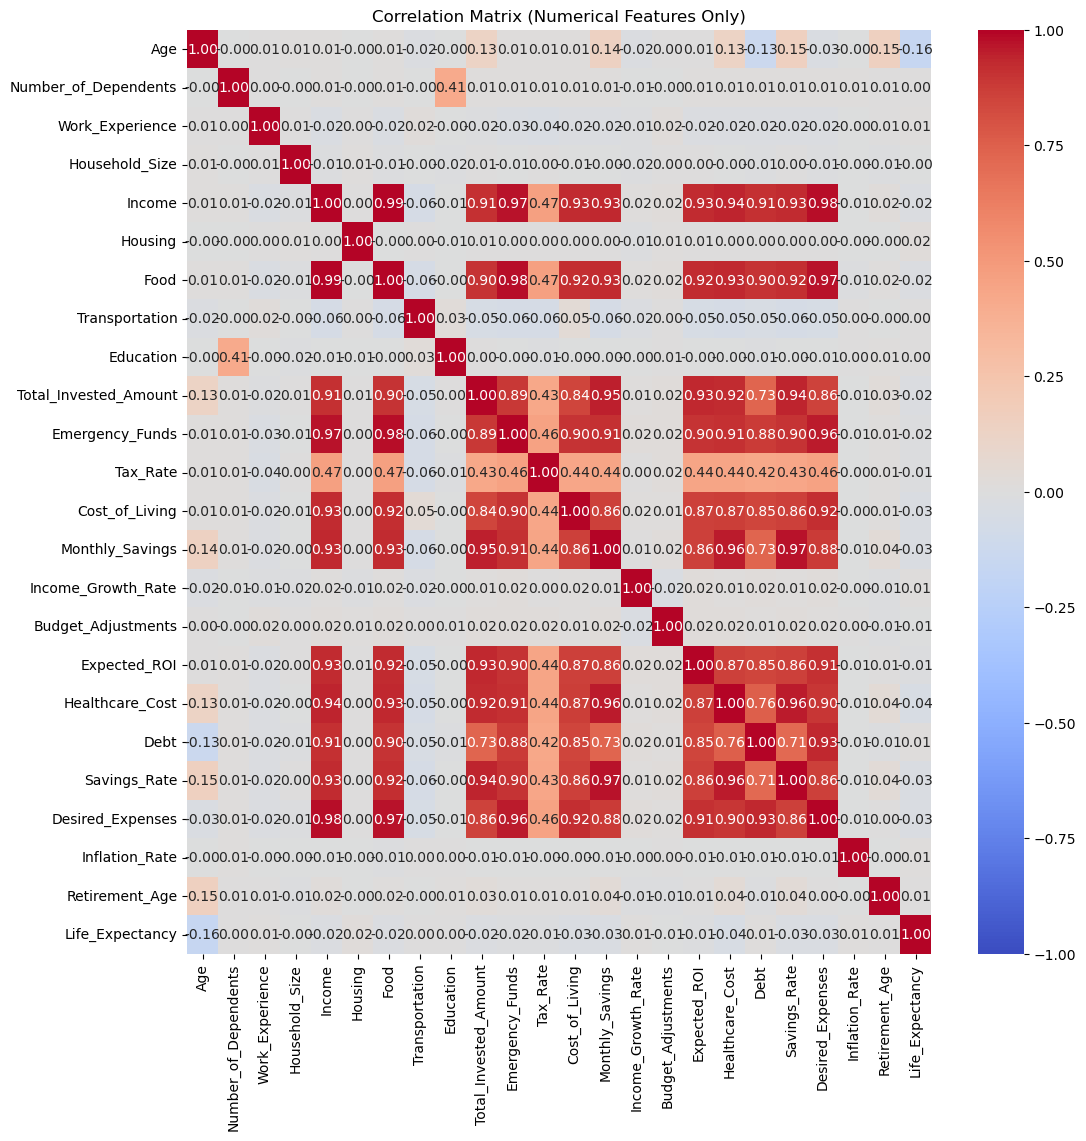

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

In [27]:
savings_rate_corr = correlation_matrix['Savings_Rate']
top_5_corr = savings_rate_corr.drop('Savings_Rate').sort_values(ascending=False).head(5)
print("Top 5 most correlated columns with 'savings_rate':")
print(top_5_corr)


Top 5 most correlated columns with 'savings_rate':
Monthly_Savings          0.971345
Healthcare_Cost          0.957237
Total_Invested_Amount    0.942491
Income                   0.926356
Food                     0.921087
Name: Savings_Rate, dtype: float64


In [28]:
top_5_features = top_5_corr.index.tolist()  # List of top 5 correlated features so can use it to train


In [29]:
X = numerical_df[top_5_features]  
y = numerical_df['Savings_Rate']  #

## Model Evaluation 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Training Set Performance:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"R²: {train_r2:.2f}")
print("\nTesting Set Performance:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"R²: {test_r2:.2f}")

Training Set Performance:
Mean Squared Error (MSE): 11391914018.47
R²: 0.95

Testing Set Performance:
Mean Squared Error (MSE): 10935723021.34
R²: 0.96


Using linear Regression ( features from top 5 most correlated ) , R²: 0.96

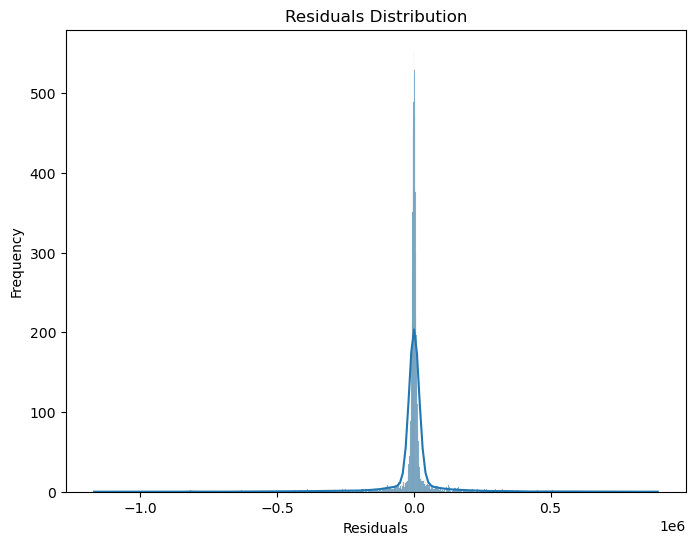

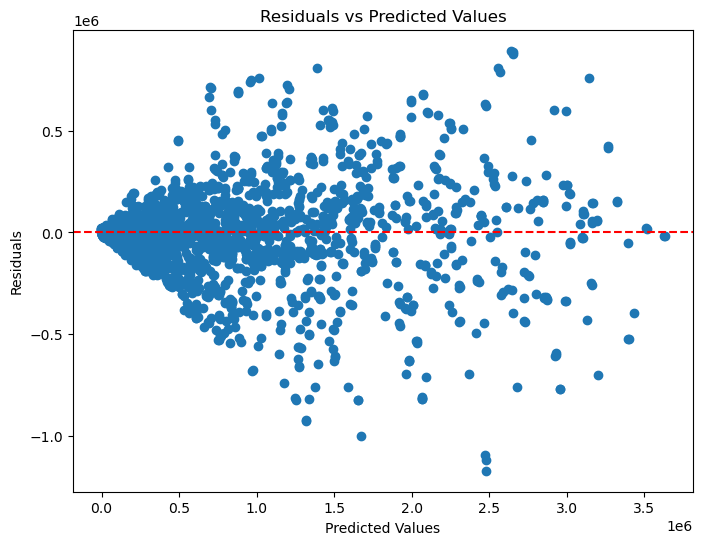

In [34]:
from sklearn.metrics import confusion_matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7: Plot residuals
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Step 8: Scatter plot of residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


## Income Growth Rate

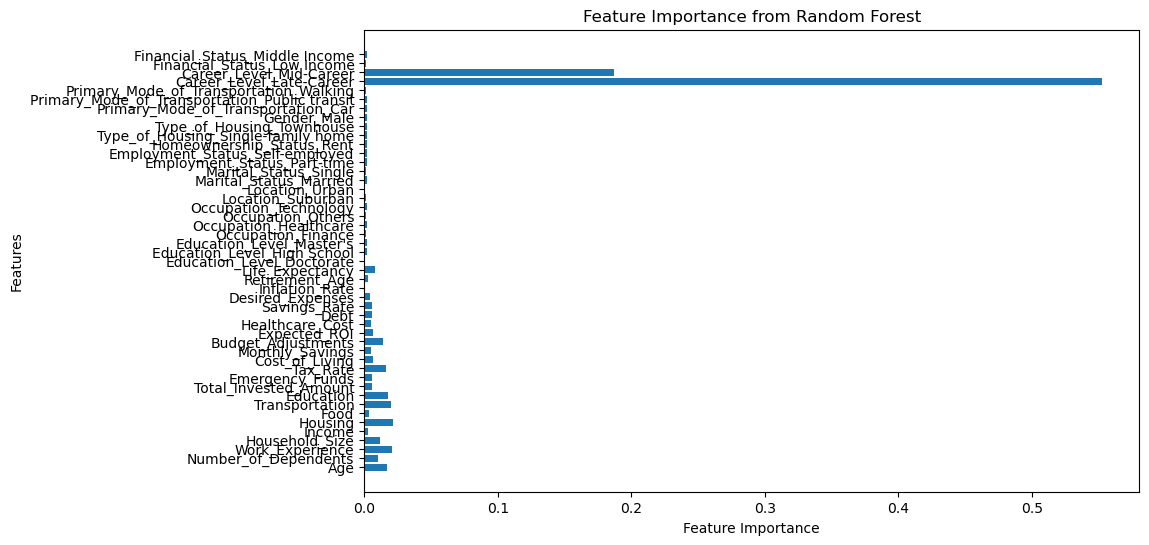

PCA Components:
[[ 1.45538161e-02  4.04739513e-03 -6.92411498e-03 -8.82680434e-04
   3.09944326e-01  5.33145166e-04  3.08534935e-01 -2.00219255e-02
  -2.17074709e-03  2.93903198e-01  3.03215124e-01  1.58212063e-01
   2.91570104e-01  2.96949572e-01  6.72701425e-03  2.94499295e-01
   2.98334390e-01  2.74726931e-01  2.95281848e-01  3.02339121e-01
  -5.36770930e-18  6.51279593e-03 -7.74259202e-03 -8.49059195e-03
   5.35935930e-03 -9.77016431e-04 -8.62317227e-03  3.86193285e-04
   2.50962017e-03  1.85728609e-04  8.33878154e-03 -1.59694239e-02
   6.65583540e-03 -5.62096449e-03  1.26982914e-02 -5.87908128e-03
   2.54042055e-02 -4.44780853e-03 -6.54294253e-03 -1.09712971e-05
  -2.21485479e-03  5.87725877e-04 -1.29333417e-04 -5.49374578e-03
   7.49789881e-04  2.66588640e-03 -5.49261444e-03]
 [ 1.13991163e-02 -1.81692120e-02 -4.24156448e-03 -9.31496281e-03
  -1.23165417e-03  1.50545391e-04 -1.22244350e-03 -5.43689474e-01
  -3.90402207e-02 -3.63718695e-04 -2.53704383e-03  3.10566969e-02
  -9.2675

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


X = df.drop(columns=['Income_Growth_Rate'])  # All columns except target
y = df['Income_Growth_Rate']  # Target column
X = pd.get_dummies(X, drop_first=True)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=8)  # Taking 8 as lots of low correlated data , can test with 5 also 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#using RandomForest to predict Income_growth_Rate
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
feature_importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()
print("PCA Components:")
print(pca.components_)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Only covers 47% of variance according to PCA

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  19.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  40.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  21.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  42.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  21.2

/Users/rashiojha/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  59.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  20.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  43.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  41.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  21.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  21.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, mi

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  38.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  41.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  21.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  21.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  41.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  42.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  42.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, mi

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.4min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.3min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  40.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 2.1min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 2.0min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  36.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 1.9min
[CV] END bootstrap=True, max_depth=None, min_sa

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  39.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  42.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  21.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  43.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, m

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  40.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time= 2.0min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  42.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.3min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 1.3min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  40.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.9min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  38.8s
[CV] END bootstrap=True, max_depth=None, min

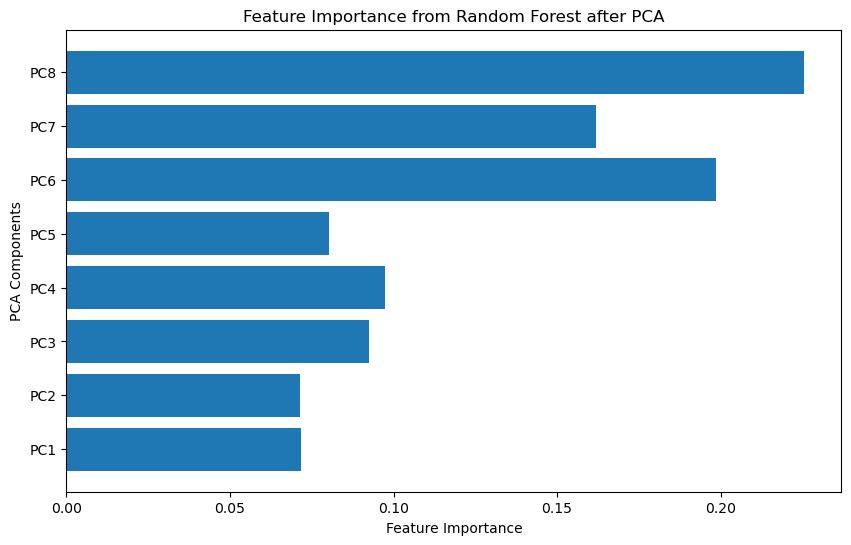

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score



X = df.drop(columns=['Income_Growth_Rate'])  # All columns except target
y = df['Income_Growth_Rate']  # Target column

# 3. Preprocess the data (handle missing values and encode categorical variables)
X = pd.get_dummies(X, drop_first=True)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Normalize/Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Apply PCA for feature extraction (dimensionality reduction)
pca = PCA(n_components=8)  # Select the top components, change as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 7. Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best hyperparameters found: ", best_params)

# 8. Train the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# 9. Evaluate the model on the test data
y_pred = best_rf_model.predict(X_test_pca)

# Calculate MSE and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 10. Plot feature importance
feature_importance = best_rf_model.feature_importances_

# Assuming PCA components are the new features
pca_features = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]

plt.figure(figsize=(10,6))
plt.barh(pca_features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('PCA Components')
plt.title('Feature Importance from Random Forest after PCA')
plt.show()


- I opted for random forest instead of linear regression as there were porrly correlated features for income growth rate which lead to a poor performance of r^2=0.65.
- With random forest : R-squared: 0.85968839894462

## Expected ROI

In [40]:
ROI_rate_corr = correlation_matrix['Expected_ROI']
top_5_corr = ROI_rate_corr.drop('Expected_ROI').sort_values(ascending=False).head(5)
print("Top 5 most correlated columns with 'savings_rate':")
print(top_5_corr)

Top 5 most correlated columns with 'savings_rate':
Total_Invested_Amount    0.934157
Income                   0.928178
Food                     0.922596
Desired_Expenses         0.911884
Emergency_Funds          0.899733
Name: Expected_ROI, dtype: float64


In [41]:
top_5_features = top_5_corr.index.tolist() 
X = numerical_df[top_5_features]  
y = numerical_df['Expected_ROI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Training Set Performance:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"R²: {train_r2:.2f}")
print("Testing Set Performance:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"R²: {test_r2:.2f}")

Training Set Performance:
Mean Squared Error (MSE): 91949439091.71
R²: 0.92

Testing Set Performance:
Mean Squared Error (MSE): 98243501071.58
R²: 0.91


Linear Regression on Expected ROI - 0.91 r^2